# # LSTM script for classifying myo armband movements

\begin{tabular}

Classes 
0 idle
1 point index
2 point ring/middle
3 point pinky
4 thumb circle
5 fist
6 extend all
7 wrist up
8 wrist down
9 wrist out

\end{tabular}

In [1]:
import numpy
import random
import time
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Conv1D
from sklearn.model_selection import train_test_split

# fix random seed for reproducibility
numpy.random.seed(333)

In [2]:
# Check numpy version is rolled back to before 1.20 for compatability with tensorflow
numpy.__version__

'1.18.5'

In [3]:
# load the datasets

dataset1=pd.read_csv('class_1.csv',header=None)
dataset2=pd.read_csv('class_2.csv',header=None)
dataset3=pd.read_csv('class_3.csv',header=None)
dataset4=pd.read_csv('class_4.csv',header=None)
dataset5=pd.read_csv('class_5.csv',header=None)
dataset6=pd.read_csv('class_6.csv',header=None)
dataset7=pd.read_csv('class_7.csv',header=None)
dataset8=pd.read_csv('class_8.csv',header=None)
dataset9=pd.read_csv('class_9.csv',header=None)
dataset10=pd.read_csv('class_10.csv',header=None)

# concat data
frames = pd.concat([dataset1,dataset2,dataset3,dataset4,dataset5,dataset6,dataset7,dataset8,dataset9,dataset10])

In [4]:
# one-hot the output for test-train split and seperate features from output column
x = frames.values[:,1:]
y = frames.values[:,0]-1
out = numpy.zeros((y.size,y.max()+1))
out[numpy.arange(y.size),y] = 1

In [5]:
# variable definitions based on data size
maxreviewlength = max(x.tolist())[0]
sensors = 5;

In [6]:
# Test-train split
X_train, X_test, y_train, y_test = train_test_split(x, out, test_size=.8,shuffle=False)

In [7]:
# reshape test train split for LSTM
X_train_reshape = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test_reshape = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

In [8]:
## Skeleton for future LSTM
## create the model
# embedding_vecor_length = maxreviewlength
# model = Sequential()
# model.add(Embedding(sensors, 5, input_length = maxreviewlength))
# model.add(Dropout(0.2))
# model.add(LSTM(100))
# model.add(Dropout(0.2))
# model.add(Dense(10, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['CategoricalAccuracy'])

# print(model.summary())

In [8]:
# Simple model. Iterate this to become more similar to model above
model_0 = Sequential()
model_0.add(LSTM(50, activation = 'relu', input_shape=(5,1)))
model_0.add(Dense(10, activation='softmax'))
model_0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['CategoricalAccuracy'])

2021-07-24 21:26:45.326355: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-07-24 21:26:45.326757: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-07-24 21:26:45.327813: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


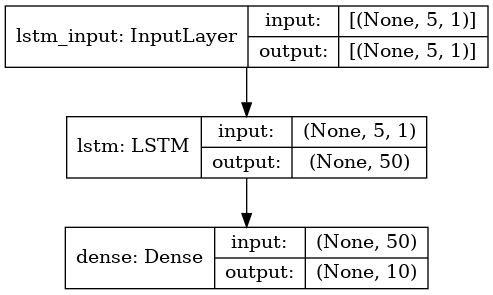

In [9]:
tf.keras.utils.plot_model(model_0, to_file='model.png', show_shapes=True, show_layer_names=True)

In [21]:
# Train the model
history = model_0.fit(X_train_reshape, y_train, validation_split=0.33, epochs=2 ,batch_size=5, verbose=0)

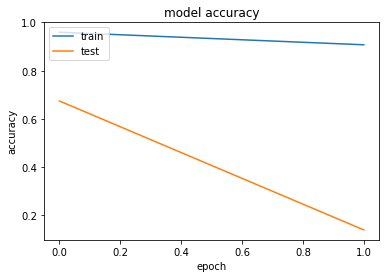

In [22]:
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

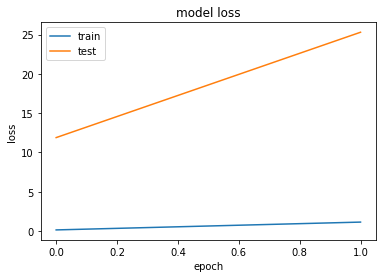

In [23]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
# Final evaluation of the model
scores = model_0.evaluate(X_test_reshape, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 0.00%


In [15]:
# # save model and architecture to single file
# model.save_weights("untrained_model.h5")
# print("Saved model to disk")

In [20]:
# # load untrained model to reset:
model_0.load_weights("untrained_model.h5")